## **1) Inicialización del entorno**

In [ ]:
#Importamos librerías para poder comenzar a trabajar con el conjunto de datos

import io
import itertools
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

import time

from sklearn import manifold, preprocessing, decomposition


## **2) Exploración de la base**

In [ ]:
data_Link = 'https://raw.githubusercontent.com/nicodavia83/Aprendizaje-No-Supervisado/main/players_22.csv'
df=pd.read_csv(data_Link, sep=',')



In [ ]:
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [ ]:
#Exploramos en la encabezado del dataset

df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [ ]:
df.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,112541.0,Wuhan FC,Chinese Super League,1.0,SUB,36.0,NaN,2021-04-01,2021.0,155,China PR,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,114000.0,NaN,NaN,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,...,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,445.0,Derry City,Rep. Ireland Airtricity League,1.0,RES,27.0,NaN,2021-02-22,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,193000.0,NaN,NaN,59.0,39.0,50.0,46.0,41.0,51.0,54,33,46,51,32,41,53,...,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,NaN,45+2,45+2,45+2,47,46,46,46,47,47+2,47+2,47+2,49+2,47+2,47+2,47+2,49+2,49+2,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,175000.0,NaN,NaN,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,...,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,12.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,239000.0,NaN,NaN,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,...,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/i

In [ ]:
#Observamos cómo está compuesto nuestro conjunto de datos

df.shape

(19239, 110)

In [ ]:
#Observamos como están compuestos los atributos

df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [ ]:
#Exploramos los valores estadísticos de las variables

df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [ ]:
#Vemos el tipo de variables con el qué contamos

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 110 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    sofifa_id                    19239 non-null  int64  
 1    player_url                   19239 non-null  object 
 2    short_name                   19239 non-null  object 
 3    long_name                    19239 non-null  object 
 4    player_positions             19239 non-null  object 
 5    overall                      19239 non-null  int64  
 6    potential                    19239 non-null  int64  
 7    value_eur                    19165 non-null  float64
 8    wage_eur                     19178 non-null  float64
 9    age                          19239 non-null  int64  
 10   dob                          19239 non-null  object 
 11   height_cm                    19239 non-null  int64  
 12   weight_kg                    19239 non-null  int64  
 13  

In [ ]:
df.club_position.tolist()

['RW',
 'ST',
 'ST',
 'LW',
 'RCM',
 'GK',
 'ST',
 'GK',
 'GK',
 'ST',
 'RCM',
 'CF',
 'GK',
 'LW',
 'CDM',
 'LCB',
 'LW',
 'RW',
 'GK',
 'RDM',
 'GK',
 'GK',
 'LCB',
 'RS',
 'LCM',
 'ST',
 'SUB',
 'SUB',
 'CAM',
 'RS',
 'ST',
 'GK',
 'RCM',
 'SUB',
 'GK',
 'CAM',
 'ST',
 'RDM',
 'LCM',
 'RCB',
 'LDM',
 'CAM',
 'LB',
 'RCM',
 'RB',
 'LM',
 'RCB',
 'SUB',
 'GK',
 'LCB',
 'LB',
 'LCM',
 'CDM',
 'LCM',
 'GK',
 'LW',
 'LCB',
 'RCB',
 'RW',
 'RS',
 'ST',
 'CDM',
 'LB',
 'LCB',
 'SUB',
 'SUB',
 'RM',
 'CDM',
 'RCB',
 'LCM',
 'GK',
 'SUB',
 'CAM',
 'GK',
 'SUB',
 'LW',
 'RCB',
 'GK',
 'LCM',
 'CAM',
 'RB',
 'ST',
 'RCM',
 'LS',
 'CB',
 'CF',
 'LW',
 'RB',
 'LCM',
 'RM',
 'RCM',
 'LDM',
 'LW',
 'LS',
 'SUB',
 'RB',
 'LCB',
 'SUB',
 'RB',
 'LCB',
 'SUB',
 'RCM',
 'RCM',
 'CDM',
 'SUB',
 'RS',
 'GK',
 'LB',
 'LCM',
 'LW',
 'ST',
 'LB',
 'SUB',
 'GK',
 'LCB',
 'RCB',
 'SUB',
 'LB',
 'LW',
 'RCB',
 'SUB',
 'LM',
 'LM',
 'SUB',
 'LB',
 'RB',
 'SUB',
 'GK',
 'CDM',
 'RDM',
 'CB',
 'CAM',
 'LM',
 'RC

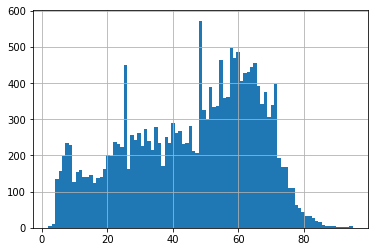

In [ ]:
df.attacking_finishing.max()-df.attacking_finishing.min()+1
nbins=89
df['attacking_finishing'].unique()
df['attacking_finishing'].hist(bins = nbins)

In [ ]:
df.overall

0        93
1        92
2        91
3        91
4        91
         ..
19234    47
19235    47
19236    47
19237    47
19238    47
Name: overall, Length: 19239, dtype: int64

**Realizamos el histograma de la variable "Overall" (Desempeño global)**

47

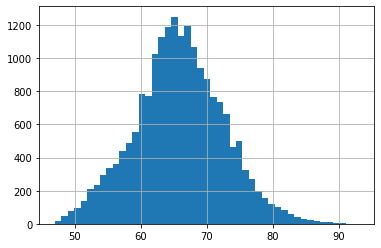

In [ ]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
nbins

- La variable 'Overall' se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo.

- La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing', 'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.

- Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'.

In [ ]:
#Mejores jugadores por posición

best_players_per_position=df.iloc[df.groupby(df['club_position'])['overall'].idxmax()]
best_players_per_position[['short_name', 'club_name', 'club_position','overall']].sort_values('overall', ascending=False)

,short_name,club_name,club_position,overall
0,L. Messi,Paris Saint-Germain,RW,93
1,R. Lewandowski,FC Bayern München,ST,92
3,Neymar Jr,Paris Saint-Germain,LW,91
4,K. De Bruyne,Manchester City,RCM,91
5,J. Oblak,Atlético de Madrid,GK,91
14,Casemiro,Real Madrid CF,CDM,89
11,K. Benzema,Real Madrid CF,CF,89
15,V. van Dijk,Liverpool,LCB,89
19,J. Kimmich,FC Bayern München,RDM,89
23,L. Suárez,Atlético de Madrid,RS,88


In [ ]:
#Conteos por posiciones

pd.DataFrame(df['club_position'].value_counts().sort_index()).sort_values('club_position', ascending=False)

,club_position
SUB,8299
RES,3168
GK,701
LCB,701
RCB,701
LB,515
RB,515
ST,476
RCM,470
LCM,470


In [ ]:
#Mejores promedios de "Overall" por equipos

club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(10)

,club_name,overall
368,Juventus,79.961538
470,Paris Saint-Germain,79.454545
358,Inter,78.857143
241,FC Bayern München,78.071429
412,Manchester United,78.000000
509,Real Madrid CF,77.757576
434,Napoli,77.500000
63,Atalanta,77.480000
512,Real Sociedad,77.280000
546,SL Benfica,76.931034


## **3) Preparación de los datos a analizar**

**Retiramos jugadores con bajo Desempeño Global (Overall), reducimos el tamaño de la base, y consideramos variables de desempeño por habilidad (skills_ratings).**

In [ ]:
 #cantidad de jugadores a considerar
n=10000

#se reduce la base a los n primeros jugadores
df_n=df.loc[:n] 

# Conservamos a los jugadores buenos
df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [ ]:
#Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización

MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [ ]:
JugadorPromedioDict={'short_name':'JugadorPromedio','overall':df_n.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()
    
df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [ ]:
# Sólo con desempeños según habilidades

df_skills = df_n[skills_ratings]

df_skills.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


## **4)Exploratorio Visual para Clustering**

Visualizamos los datos de a dos variables numéricas.

**Consigna de trabajo en grupo**

- Buscar agrupamiento de datos usando las variables en skill_ratings de a pares.

In [ ]:
skills_ratings

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

In [ ]:
# Diferenciamos a los mejores jugadores
bool_crack = df_n['overall'] > 85

# Elegimos dos variables. Se toman dos números entre 0 y n_skills - 1

skill_1 = skills_ratings[1] # attacking_finishing
skill_2 = skills_ratings[31] # goalkeeping_kicking

- Gráfica con matplotlib.pyplot. Liviana pero más sencilla.

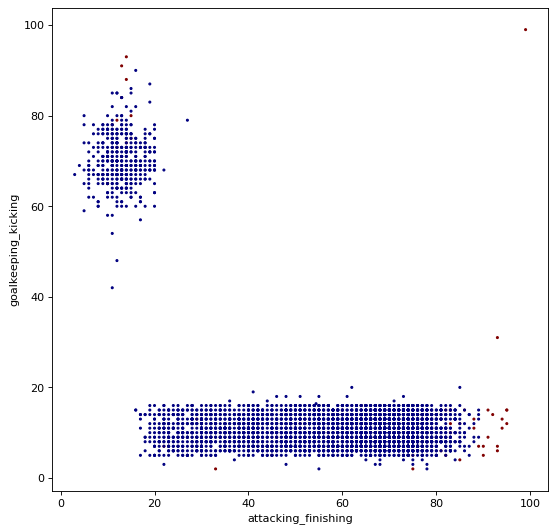

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
#diferenciamos a los arqueros

bool_GK=df_n["club_position"] == 'GK' 

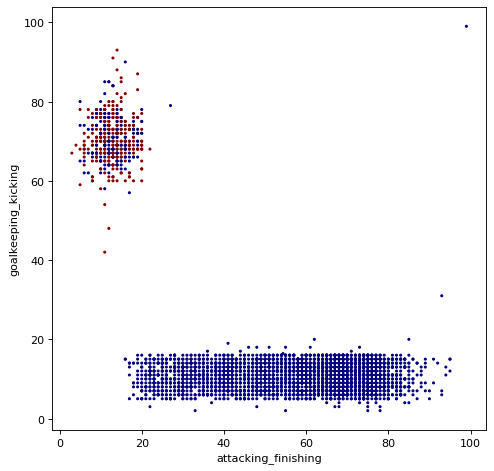

In [ ]:
plt.figure(figsize=(7,7), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_GK,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [ ]:
# #Gráficos de correlación entre variables.

# sns.pairplot(df_skills[skills_ratings[0:5]])

Gráfica con plotly. Es más completa e interactiva, pero un poco pesada.

In [ ]:
graf = go.Scatter(x=df_skills[skill_1],
                  y=df_skills[skill_2],
                  mode='markers',
                  text=df_n.loc[:, 'club_name'],
                  marker=dict(size=5)
                 )

crack = go.Scatter(x=df_skills.loc[bool_crack, skill_1],
                   y=df_skills.loc[bool_crack, skill_2],
                   name='Top Players',
                   text=df_n.loc[bool_crack, 'short_name'],
                   textfont=dict(family='sans serif', size=10, color='black'),
                   opacity=0.9,
                   mode='text'
                  )

data = [graf, crack]

layout = go.Layout(title='Visualización del DataSet (con 2 variables)',
                   titlefont=dict(size=20),
                   xaxis=dict(title=skill_1),
                   yaxis=dict(title=skill_2),
                   autosize=False,
                   width=700,
                   height=700
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
#En Colab
fig.show(renderer="colab")


-----------------------------------------------------
En la próxima gráfica, similar a la anterior, también se diferencian los mejores jugadores y alguna característica/variable de interés (que pueden cambiar)

Se puede ubicar también un jugador en particular. Con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [ ]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 

bool_crack=df_n["overall"] > 85

bool_elecc=df_n["club_position"]=='GK' 

bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'
#bool_elecc=df_n["Name"]=='JugadorPromedio'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[4]  #4
skill_2=skills_ratings[10]  #10

In [ ]:
palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average players',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'club_position'],
                         opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

**Identifiquemos algunos jugadores por nombre**

In [ ]:
print(df_n.loc[0:50,"short_name"])

0                L. Messi
1          R. Lewandowski
2       Cristiano Ronaldo
3               Neymar Jr
4            K. De Bruyne
5                J. Oblak
6               K. Mbappé
7                M. Neuer
8           M. ter Stegen
9                 H. Kane
10               N. Kanté
11             K. Benzema
12            T. Courtois
13                 H. Son
14               Casemiro
15            V. van Dijk
16                S. Mané
17               M. Salah
18                Ederson
19             J. Kimmich
20                Alisson
21          G. Donnarumma
22           Sergio Ramos
23              L. Suárez
24               T. Kroos
25              R. Lukaku
26               K. Navas
27            R. Sterling
28        Bruno Fernandes
29             E. Haaland
30              S. Agüero
31              H. Lloris
32              L. Modrić
33            Á. Di María
34            W. Szczęsny
35              T. Müller
36            C. Immobile
37               P. Pogba
38          

In [ ]:
df_skills=df_n[skills_ratings]

#Entrada, matriz de datos X

df_skills

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.000000,95.000000,70.000000,91.000000,88.000000,96.000000,93.000000,94.000000,91.00000,96.000000,91.000000,80.000000,91.00000,94.000000,95.000000,86.000000,68.00000,72.000000,69.00000,94.000000,44.000000,40.000000,93.000000,95.000000,75.000000,96.0000,20.000000,35.00000,24.00000,6.000000,11.000000,15.000000,14.000000,8.000000
1,71.000000,95.000000,90.000000,85.000000,89.000000,85.000000,79.000000,85.000000,70.00000,88.000000,77.000000,79.000000,77.00000,93.000000,82.000000,90.000000,85.00000,76.000000,86.00000,87.000000,81.000000,49.000000,95.000000,81.000000,90.000000,88.0000,35.000000,42.00000,19.00000,15.000000,6.000000,12.000000,8.000000,10.000000
2,87.000000,95.000000,90.000000,80.000000,86.000000,88.000000,81.000000,84.000000,77.00000,88.000000,85.000000,88.000000,86.00000,94.000000,74.000000,94.000000,95.00000,77.000000,77.00000,93.000000,63.000000,29.000000,95.000000,76.000000,88.000000,95.0000,24.000000,32.00000,24.00000,7.000000,11.000000,15.000000,14.000000,11.000000
3,85.000000,83.000000,63.000000,86.000000,86.000000,95.000000,88.000000,87.000000,81.00000,95.000000,93.000000,89.000000,96.00000,89.000000,84.000000,80.000000,64.00000,81.000000,53.00000,81.000000,63.000000,37.000000,86.000000,90.000000,93.000000,93.0000,35.000000,32.00000,29.00000,9.000000,9.000000,15.000000,15.000000,11.000000
4,94.000000,82.000000,55.000000,94.000000,82.000000,88.000000,85.000000,83.000000,93.00000,91.000000,76.000000,76.000000,79.00000,91.000000,78.000000,91.000000,63.00000,89.000000,74.00000,91.000000,76.000000,66.000000,88.000000,94.000000,83.000000,89.0000,68.000000,65.00000,53.00000,15.000000,13.000000,5.000000,10.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,70.000000,61.000000,49.000000,71.000000,29.000000,71.000000,74.000000,35.000000,69.00000,72.000000,80.000000,82.000000,67.00000,58.000000,65.000000,45.000000,69.00000,73.000000,70.00000,40.000000,50.000000,64.000000,65.000000,59.000000,40.000000,70.0000,68.000000,70.00000,67.00000,12.000000,12.000000,11.000000,15.000000,9.000000
4591,64.000000,74.000000,72.000000,63.000000,58.000000,66.000000,56.000000,49.000000,57.00000,65.000000,79.000000,74.000000,55.00000,70.000000,75.000000,74.000000,68.00000,65.000000,74.00000,63.000000,70.000000,30.000000,73.000000,59.000000,63.000000,59.0000,35.000000,38.00000,34.00000,14.000000,15.000000,14.000000,12.000000,8.000000
4592,57.000000,61.000000,54.000000,70.000000,61.000000,71.000000,60.000000,49.000000,74.00000,78.000000,59.000000,62.000000,53.00000,71.000000,55.000000,62.000000,61.00000,78.000000,72.00000,66.000000,72.000000,66.000000,68.000000,71.000000,48.000000,74.0000,64.000000,70.00000,61.00000,13.000000,10.000000,10.000000,6.000000,9.000000
4593,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.00000,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0000,99.000000,99.00000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000


**- Es necesario la normalización de datos. Normalizar ayuda al clustering porque los grupos se forman a partir de distancias. Si hay atributos con escalas muy diferentes, los atributos de escala mayor dominarán las distancias. Por lo que ante un dataset sin escalar, los algoritmos de agrupamiento pueden arrojar un número de clusters que no es el real o el óptimo con el que queremos trabajar.**

In [ ]:
#Estandarizamos los datos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_matrix = scaler.fit_transform(df_skills)

df_skills_scaled = pd.DataFrame(data=scaled_matrix, columns=df_skills.columns)

In [ ]:
df_skills_scaled

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.849462,0.958333,0.684783,0.909091,0.884211,0.967391,0.935484,0.947368,0.911111,0.966667,0.904762,0.771084,0.900000,0.918033,0.949367,0.833333,0.557143,0.686047,0.577465,0.947368,0.375000,0.365591,0.937500,0.955056,0.736264,0.962963,0.159574,0.304348,0.184783,0.041237,0.092784,0.134021,0.123711,0.061856
1,0.698925,0.958333,0.902174,0.840909,0.894737,0.847826,0.784946,0.852632,0.677778,0.877778,0.738095,0.759036,0.725000,0.901639,0.784810,0.884615,0.800000,0.732558,0.816901,0.873684,0.795455,0.462366,0.958333,0.797753,0.901099,0.864198,0.319149,0.380435,0.130435,0.134021,0.041237,0.103093,0.061856,0.082474
2,0.870968,0.958333,0.902174,0.784091,0.863158,0.880435,0.806452,0.842105,0.755556,0.877778,0.833333,0.867470,0.837500,0.918033,0.683544,0.935897,0.942857,0.744186,0.690141,0.936842,0.590909,0.247312,0.958333,0.741573,0.879121,0.950617,0.202128,0.271739,0.184783,0.051546,0.092784,0.134021,0.123711,0.092784
3,0.849462,0.833333,0.608696,0.852273,0.863158,0.956522,0.881720,0.873684,0.800000,0.955556,0.928571,0.879518,0.962500,0.836066,0.810127,0.756410,0.500000,0.790698,0.352113,0.810526,0.590909,0.333333,0.864583,0.898876,0.934066,0.925926,0.319149,0.271739,0.239130,0.072165,0.072165,0.134021,0.134021,0.092784
4,0.946237,0.822917,0.521739,0.943182,0.821053,0.880435,0.849462,0.831579,0.933333,0.911111,0.726190,0.722892,0.750000,0.868852,0.734177,0.897436,0.485714,0.883721,0.647887,0.915789,0.738636,0.645161,0.885417,0.943820,0.824176,0.876543,0.670213,0.630435,0.500000,0.134021,0.113402,0.030928,0.082474,0.113402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0.688172,0.604167,0.456522,0.681818,0.263158,0.695652,0.731183,0.326316,0.666667,0.700000,0.773810,0.795181,0.600000,0.327869,0.569620,0.307692,0.571429,0.697674,0.591549,0.378947,0.443182,0.623656,0.645833,0.550562,0.351648,0.641975,0.670213,0.684783,0.652174,0.103093,0.103093,0.092784,0.134021,0.072165
4591,0.623656,0.739583,0.706522,0.590909,0.568421,0.641304,0.537634,0.473684,0.533333,0.622222,0.761905,0.698795,0.450000,0.524590,0.696203,0.679487,0.557143,0.604651,0.647887,0.621053,0.670455,0.258065,0.729167,0.550562,0.604396,0.506173,0.319149,0.336957,0.293478,0.123711,0.134021,0.123711,0.103093,0.061856
4592,0.548387,0.604167,0.510870,0.670455,0.600000,0.695652,0.580645,0.473684,0.722222,0.766667,0.523810,0.554217,0.425000,0.540984,0.443038,0.525641,0.457143,0.755814,0.619718,0.652632,0.693182,0.645161,0.677083,0.685393,0.439560,0.691358,0.627660,0.684783,0.586957,0.113402,0.082474,0.082474,0.041237,0.072165
4593,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **5) Clustering con KMeans**


Es necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo.

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

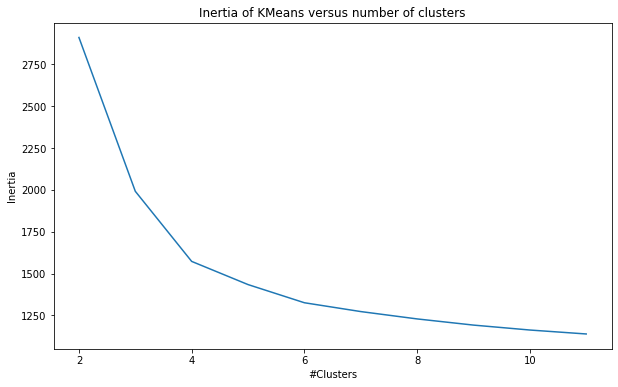

In [ ]:
# Justificación para elegir el hiperparámetro 'n_clusters' variando de 2 a 11 clusters

scores = [KMeans(n_clusters=i).fit(df_skills_scaled).inertia_ for i in range(2, 12)]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 12), scores)
plt.xlabel('#Clusters')
plt.ylabel('Inertia')
plt.title('Inertia of KMeans versus number of clusters');

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_scaled) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  1572.4241369958745


In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,kmeans_4
0,158023.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93.0,93.0,78000000.0,320000.0,34.0,1987-06-24,170.0,72.0,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52.0,Argentina,1369.0,RW,10.0,Left,4.0,4.0,5.0,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,...,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2
1,188545.0,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.0,92.0,119500000.0,270000.0,32.0,1988-08-21,185.0,81.0,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37.0,Poland,1353.0,RS,9.0,Right,4.0,4.0,5.0,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,...,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,2
2,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.0,91.0,45000000.0,270000.0,36.0,1985-02-05,187.0,83.0,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,...,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,2
3,190871.0,https://sofifa.com/player/190871/neymar-da-sil...,Neymar 

**Graficamos el resultado de agrupar a los jugadores usando kmeans con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Elijo dos números entre 0 y  de n_skills-1

skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Cracks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab:
fig.show(renderer="colab")

**Podemos inferir a partir del gráfico del número de clusters óptimos para K-Means que para las variables de "Aceleración" y "Habilidad para el control del balón" vamos a encontrar más cerca de nuestro "Machine Gun" a aquellos jugadores dentro de la posición de delanteros y con mayor desempeño, ya que es esta posición la que requiere en conjunto ambas variables. Para mediocampistas  y defensores, que es donde se visualiza gran parte de los jugadores que conforman los clusters subsiguientes al de delanteros, podemos observar la necesidad de contar con habilidad en el control del balón, pero no así tanto una gran aceleración.
Por último, vemos a partir de la maximización de la distancia a aquel cluster conformado por arqueros que son quienes no requieren de una gran habilidad para estas dos variables dado su desempeño en el campo de juego.**

In [ ]:
#Creamos una nueva variable categórica de la base recodificando la posición para simplificar el análisis de los resultados de clustering

forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS','RW']
midfielders=['RCM','RM','LM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'Other Position'

In [ ]:
df_n["club_position_2"]=df_n["club_position"].apply(lambda x: pos2(x))

df_n["club_position_2"].value_counts()

Other Position    1808
Midfielder        1064
Defender           915
Forward            522
GK                 286
Name: club_position_2, dtype: int64

##  **6) Clustering MeanShift**

- No es necesario definirle la cantidad de grupos/clusters
- No es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media)

**La elección justificada del hiperparámetro en el caso del algoritmo de MeanShift tiene que ver con la selección del radio o ancho de banda para el cual converjan hacia el centroide los puntos de dato que conformen el número de clusters óptimos, que como vimos previamente en el método del codo, es 4**

In [ ]:
ms = MeanShift(bandwidth=0.4, bin_seeding=True)

ms.fit(df_skills_scaled)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4


Graficamos los resultados:

In [ ]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[15]
skill_2=skills_ratings[28]

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills_scaled[skill_1], y=df_skills_scaled[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills_scaled.loc[bool_crack,skill_1], y=df_skills_scaled.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  4 clusters, según los hiperparámetros elegidos


**Para este caso específico de MeanShift elegimos dos variables diferentes a partir de las cuales se podían obtener conclusiones diferentes.
Al ser las dos variables elegidas características de vinculación baja, los clusters encontrados tendrán una distribución diferente al que pudimos visualizar en el algoritmo K-Means.
Podemos observar que es difícil encontrar a jugadores que cuenten con gran habilidad en lo que a potencia de disparo se refiere y a su vez tengan una alto grado de defensa en el piso raspando; por lo que se puede observar que los pocos jugadores que cuentan con ambas habilidades, no tienen una gran cercanía al Machine Gun previamente establecido.
Vemos por supuesto una mayor proporción de delanteros en el pequeño (y disperso) cluster de abajo a la derecha por su gran habilidad de potencia en el disparo, pero baja puntuación en lo que a defensa en el piso se refiere.
Por otro lado, en el gran cluster azul de la parte de arriba, se observa una mezcla de defensores y mediocampistas que cuentan con un poco de ambas habilidades en una gran proporción, aunque en mayor medida a la habilidad de defensa en el piso.**

## **7) Visualización_con_Embeddings_tSNE**

In [ ]:
 #cantidad de jugadores a considerar
n_sne =10000

#se reduce la base a los n primeros jugadores
df_sne=df.loc[:n_sne] 

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

X = df_sne[skills_ratings]

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [ ]:
#Visualizamos el encabezado

X.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13


In [ ]:
X.tail()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
9996,13,17,12,39,16,15,18,19,33,26,56,56,58,61,53,50,50,37,64,20,25,21,13,35,25,33,22,20,19,67,63,67,64,65
9997,60,64,56,62,55,69,50,56,52,68,77,76,76,63,74,68,78,65,64,63,66,26,65,57,57,63,31,30,12,10,11,13,10,11
9998,66,54,47,67,62,67,69,69,55,65,77,58,82,64,78,69,71,62,51,69,54,38,61,64,59,59,41,24,20,11,7,14,9,8
9999,57,47,62,66,46,60,55,57,64,63,68,64,71,62,71,60,80,78,71,58,65,65,57,59,44,63,61,62,61,16,7,12,10,13
10000,26,29,63,61,30,42,25,27,64,50,68,66,41,60,58,45,84,72,80,27,74,63,30,37,36,57,59,64,66,14,16,30,14,14


**Transformaremos el espacio de Dim 34 en un espacio de Dim 2 (n_components = 2)**.

In [ ]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

time_end = time.time()

print(f't-SNE done! Time elapsed: {time_end - time_start} seconds')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.001s...
[t-SNE] Computed neighbors for 10001 samples in 1.886s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 13.288036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.563538
[t-SNE] KL

**El resultado (X_tsne) se guarda en una arreglo numpy de tamaño...**

- Cantidad de filas n_sne (= 2000)

- Cantidad de columnas n_components (= 2)

In [ ]:
X_tsne[:10] # algunos jugadores

array([[ -2.1369948, -39.13757  ],
       [ -3.2415347, -45.200836 ],
       [ -3.5023808, -45.217842 ],
       [ -2.400741 , -39.079914 ],
       [ 22.449207 , -23.469347 ],
       [ 66.5538   , -20.217985 ],
       [ -2.0757253, -42.165306 ],
       [ 68.057945 , -17.402027 ],
       [ 67.86759  , -17.72881  ],
       [ -2.7217634, -45.615356 ]], dtype=float32)

In [ ]:
# Diferenciamos a los mejores jugadores
bool_crack = df_sne['overall'] > 85

**GRAFICAMOS: Scatter Plot**

Las variables que usamos para el scatterplot son las 2 componentes dadas por **tSNE**.

Agregamos los nombres de los cracks (Overall mayor a 85) y vemos una tercera variable recorriendo los puntos sobre el gráfico.

In [ ]:
# Graficamos los datos en el espacio transformado, las dos componentes tsne.

graf = go.Scatter(x=X_tsne[:, 0],
                  y=X_tsne[:, 1],
                  mode='markers',
                  text=df_sne.loc[:,'club_position'],
                  marker=dict(size=5)
                 )

crack = go.Scatter(x=X_tsne[bool_crack, 0],
                   y=X_tsne[bool_crack, 1],
                   name='Top Players',
                   text=df_sne.loc[bool_crack, 'short_name'],
                   textfont=dict(family='sans serif', size=10, color='black'),
                   opacity=0.9,
                   mode='text'
                  )

data = [graf, crack]

layout = go.Layout(title='Visualización en el espacio TSNE',
                   titlefont=dict(size=20),
                   xaxis=dict(title='Componente 1'),
                   yaxis=dict(title='Componente 2'),
                   autosize=False,
                   width=1000,
                   height=700
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

**INTERPRETACIÓN**

Un poco de análisis visual supervisado usando tsne.

Ponemos a prueba la intuición o preconcepto de que los jugadores se agrupan en el espacio de las habilidades (transformado/reducido por tsne) según la posición...

Creamos una nueva columna con **4** categorías de posiciones.

In [ ]:
goalkeepers = ['GK']
defenders = ['LCB', 'RCB', 'CB', 'LB', 'RB', 'LWB', 'RWB']
midfielders = ['LCM', 'RCM', 'LDM', 'RDM', 'LAM', 'RAM', 'CM', 'CDM', 'CAM', 'CF']
forwards = ['LF', 'RF', 'LW', 'RW', 'LS', 'RS', 'LM', 'RM', 'ST']

def general_position(position):
    if position in forwards:
        return 'Forward'
    elif position in midfielders:
        return 'Midfielder'
    elif position in defenders:
        return 'Defender'
    elif position in goalkeepers:
        return 'GK'
    else:
        return 'Other Position'

In [ ]:
df_sne['General_Position'] = df_sne['club_position'].apply(lambda x: general_position(x))

df_sne['General_Position'].value_counts()

Other Position    4522
Defender          1919
Forward           1589
Midfielder        1447
GK                 524
Name: General_Position, dtype: int64

**GRAFICAMOS**

Las variables que usamos para el scatterplot son las 2 componentes dadas por **tSNE**.

Diferenciamos usando vectores booleanos para cada posición, y si es un crack.

In [ ]:
bool_gk = df_sne['General_Position'] == 'GK'

bool_defender = df_sne['General_Position'] == 'Defender'

bool_midfielder = df_sne['General_Position'] == 'Midfielder'

bool_striker = df_sne['General_Position'] == 'Forward'

In [ ]:
palette = ['navy', 'red', 'yellow', 'orange', 'green', 'pink', 'grey']

striker = go.Scatter(x=X_tsne[bool_striker, 0],
                     y=X_tsne[bool_striker, 1],
                     name='Striker',
                     text=df_sne.loc[bool_striker, 'short_name'],
                     opacity=0.9,
                     marker=dict(color=palette[0], size=5),
                     mode='markers'
                    )

midfielder = go.Scatter(x=X_tsne[bool_midfielder, 0],
                        y=X_tsne[bool_midfielder, 1],
                        name='Midfielder',
                        text=df_sne.loc[bool_midfielder, 'short_name'],
                        opacity=0.6,
                        marker=dict(color=palette[1], size=5),
                        mode='markers'
                       )

defender = go.Scatter(x=X_tsne[bool_defender, 0],
                      y=X_tsne[bool_defender, 1],
                      name='Defender',
                      text=df_sne.loc[bool_defender, 'short_name'],
                      opacity=0.7,
                      marker=dict(color=palette[2], size=5),
                      mode='markers'
                     )

gk = go.Scatter(x=X_tsne[bool_gk, 0],
                y=X_tsne[bool_gk, 1],
                name='GK',
                text=df_sne.loc[bool_gk, 'short_name'],
                opacity=0.4,
                marker=dict(color=palette[3], size=5),
                mode='markers'
               )

crack = go.Scatter(x=X_tsne[bool_crack, 0],
                   y=X_tsne[bool_crack, 1],
                   name='Top Player',
                   text=df_sne.loc[bool_crack, 'short_name'],
                   textfont=dict(family='sans serif', color='black', size=16),
                   opacity=0.9,
                   mode='text'
                  )

data = [striker, midfielder, defender, gk, crack]

layout = go.Layout(title='t-SNE - FIFA Players',
                   titlefont=dict(size=20),
                   autosize=False,
                   width=1150,
                   height=750
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

**Como conclusión, podemos ver que en este espacio 2D es realmente muy evidente la separación de los arqueros del resto de los jugadores (lo cual es lógico pues sus habilidades son muy diferentes).**

**El agrupamiento visual de los jugadores, en este espacio, no es tan evidente pues los clusters no son disconexos.**

**Las posiciones no explican tan claramente los clusters encontrados.**

**Una explicación posible puede ser porque hay jugadores ambivalentes que unen los espacios entre defensa, mediocampo, y ataque.**

## **8) Componentes Principales**

**PCA**

Para reducción de dimensión, de n dimensiones a m dimensiones con m<<n

**Variables de Desempeño (skills_ratings)**

Retiramos arqueros y jugadores con bajo Overall.

In [ ]:
n_acp = 18000

# Primeros jugadores
df_acp = df.loc[:n_acp]

# Mejores jugadores (sin arqueros)
df_acp = df_acp[(df_acp['club_position'] != 'GK') & (df_acp['overall'] > 70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                 ]

# Otros skills_ratings! Sacamos las habilidades de los arqueros

Restringimos los datos a las variables numéricas que consideramos.

In [ ]:
X = df_acp[skills_ratings] # Datos para proyectar

print(f'Dimensión del espacio de los datos: {len(skills_ratings)}')

Dimensión del espacio de los datos: 29


**Se computan los Componentes Principales**

Cuando se usa decomposition.**PCA** :
La descomposición PCA de sklearn centra los datos pero no los estandariza (input data is centered but not scaled for each feature before applying the SVD). Por lo tanto, primero **estandarizamos**.

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X)

X_scaled = std_scale.transform(X) # Numpy Array Estandarizado (le resta la media y divide por el desvío)

In [ ]:
X.values[0], X_scaled[0]

(array([85, 95, 70, 91, 88, 96, 93, 94, 91, 96, 91, 80, 91, 94, 95, 86, 68,
        72, 69, 94, 44, 40, 93, 95, 75, 96, 20, 35, 24]),
 array([ 1.48048674,  2.06474223,  0.54675286,  2.02773674,  1.97396264,
         1.94594615,  1.93186041,  2.35052388,  2.24880563,  2.15355872,
         1.5891453 ,  0.7738017 ,  1.61238835,  3.96544969,  2.00147893,
         1.52772151, -0.10678475, -0.02052369, -0.10687145,  1.97612817,
        -1.51566385, -0.82921173,  1.76423747,  2.43502122,  1.22399967,
         3.2395227 , -1.85915838, -1.05842517, -1.40004801]))

**DESCOMPOSICIÓN PCA**

En la descomposición podemos elegir n_components para quedarnos con una cantidad chica de componentes. La idea es que sean bastante menos que la dimensión de lo datos pero que describan un buen porcentaje de la dispersión de los mismos.

In [ ]:
pca = decomposition.PCA(n_components=4) # Elegimos 4, pero pueden ser más...

pca.fit(X_scaled) # Input data is centered but not scaled for each feature before applying the SVD

# Proporción de Varianza
print(f'Proporción de Varianza por componente: {pca.explained_variance_ratio_}')
# Proporción de Varianza Acumulada
print(f'Proporción de Varianza Acumulada por componente: {pca.explained_variance_ratio_.cumsum()}')

X_projected = pca.transform(X_scaled) # Numpy Array
print(f'Tamaño de los datos: {X_projected.shape}')

Proporción de Varianza por componente: [0.42270203 0.20649521 0.08934582 0.06396921]
Proporción de Varianza Acumulada por componente: [0.42270203 0.62919724 0.71854306 0.78251227]
Tamaño de los datos: (4307, 4)


In [ ]:
print(X_projected[0:5]) # 5 primeros jugadores (con sus n_components)

[[-8.54153396  1.93914783  1.52852848  0.71503801]
 [-6.39422278  0.37813696  3.99303823 -1.55528467]
 [-7.12903891  1.36311053  3.45764386 -2.15251162]
 [-7.79880622  1.80528845  0.39829493  0.21849313]
 [-7.34132138 -1.57736601  1.47641048  1.66899126]]


In [ ]:
pcW = pca.components_ # Composición de las primeras componentes

print(pcW) # Aporte de las variables skills_ratings

[[-0.23621405 -0.24309676 -0.0485404  -0.22789964 -0.23903067 -0.26699024
  -0.25381424 -0.2246488  -0.18182359 -0.25802186 -0.17851694 -0.15370244
  -0.21174991 -0.10260581 -0.19250124 -0.19947862  0.02403539 -0.15726385
   0.07687004 -0.25414018 -0.04237477  0.00700016 -0.25854289 -0.23147098
  -0.21772156 -0.18495308  0.00805663  0.00716643  0.01901861]
 [-0.05543267  0.12048488 -0.22906253 -0.18391095  0.09672407 -0.02092467
   0.01154325  0.01845865 -0.21717168 -0.09494393  0.07699087  0.04464361
   0.09036141 -0.07578164  0.05647489  0.07170059 -0.12661489 -0.19532371
  -0.17506527  0.0458202  -0.32316098 -0.38232294  0.05764352  0.03963384
   0.070452   -0.10738343 -0.38134663 -0.38625543 -0.3820638 ]
 [-0.15575711  0.16171143  0.30409318  0.01602241  0.19102565 -0.04837128
  -0.0117876   0.04094219 -0.04110038  0.0193131  -0.32455525 -0.27171746
  -0.29918819  0.18284229 -0.32438436  0.24917523  0.08333556 -0.11127076
   0.38450402  0.12696786  0.12296489 -0.11329339  0.0796310

El siguiente gráfico muestra la composición de los pesos de las dos primeras componentes principales.

In [ ]:
# Graph 1
data = []

for i, (x, y) in enumerate(zip(pcW[0, :], pcW[1, :])):
    graph = go.Scatter(x=[0, x],
                       y=[0, y],
                       text=X.columns[i],
                       mode='lines+markers+text',
                       textposition='top left',
                       textfont=dict(family='sans serif', size=15)
                      )
    data.append(graph)

layout = go.Layout(title='ACP - FIFA Skills',
                   titlefont=dict(size=20),
                   xaxis=dict(title='Componente 1'),
                   yaxis=dict(title='Componente 2'),
                   autosize=False,
                   width=1050,
                   height=750,
                   showlegend=False
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

Se crea el jugador perfecto, MachineGun, para ver a donde se ubica en nuestra visualización. Se lo agrega a los datos normalizados, y a las componentes ya calculadas (sin usarlo).

In [ ]:
MachineGunDict = { 'Name': 'MachineGun'
                 , 'Overall': 99
                 }

for skills in skills_ratings:
    MachineGunDict[skills] = 99

# Agregamos el jugador a la base
df_acp = df_acp.append(MachineGunDict, ignore_index=True)

X = df_acp[skills_ratings] # Datos sin estandarizar

# Volvemos a estandarizar con el dato agregado, pero con la estandarización de la base sin el dato nuevo
X_scaled = std_scale.transform(X)

X_projected = pca.transform(X_scaled) # Volvemos a proyectar pero con el dato nuevo

**Graficamos a los jugadores usando las dos primeras componentes de PCA**

Proyectamos los datos (de **dim 29**) en ese nuevo espacio (de **dim 2**).

Identificamos a MachineGun y a un jugador en particular, por ejemplo, Lionel Messi.

In [ ]:
# Graph 2

# Choose your player
jugador_buscado = df_acp['short_name'] == 'L. Messi'

bool_crack = df_acp['overall'] > 85
bool_machinegun = df_acp['short_name'] == 'MachineGun'

acp_crack = go.Scatter(x=X_projected[bool_crack, 0],
                       y=X_projected[bool_crack, 1],
                       name='Crack',
                       text=df_acp.loc[bool_crack, 'short_name'],
                       textfont=dict(family='sans serif', size=15, color='black'),
                       opacity=0.9,
                       marker=dict(color=palette[0], size=7),
                       mode='markers+text'
                      )

acp_average = go.Scatter(x=X_projected[~bool_crack, 0],
                         y=X_projected[~bool_crack, 1],
                         name='Average Player',
                         text=df_acp.loc[~bool_crack, 'short_name'],
                         opacity=0.6,
                         marker=dict(color=palette[1], size=3),
                         mode='markers'
                        )

acp_machinegun = go.Scatter(x=X_projected[bool_machinegun, 0],
                            y=X_projected[bool_machinegun, 1],
                            name='Perfect Player',
                            textfont=dict(family='sans serif', size=20, color='black'),
                            opacity=0.6,
                            marker=dict(color=palette[2], size=30),
                            mode='markers+text'
                           )

jugador_buscado = go.Scatter(x=X_projected[jugador_buscado, 0],
                             y=X_projected[jugador_buscado, 1],
                             name='Searched Player',
                             text=df_acp.loc[jugador_buscado, 'Name'],
                             textfont=dict(family='sans serif', size=20, color='black'),
                             opacity=1,
                             marker=dict(color=palette[3], size=40),
                             mode='markers+text'
                            )

data = [acp_average, acp_crack, acp_machinegun, jugador_buscado]

layout = go.Layout(title='ACP - FIFA Players',
                   titlefont=dict(size=20),
                   xaxis=dict(title='Componente 1'),
                   yaxis=dict(title='Componente 2'),
                   autosize=False,
                   width=1000,
                   height=750
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

Se pueden comparar dos equipos y ver los perfiles de los jugadores en las dos primeras componentes.

In [ ]:
teamA = 'Inter'
teamB = 'Manchester United'

bool_teamA = df_acp['club_name'] == teamA
bool_teamB = df_acp['club_name'] == teamB

acp_teamA = go.Scatter(x=X_projected[bool_teamA, 0],
                       y=X_projected[bool_teamA, 1],
                       name=teamA,
                       text=df_acp.loc[bool_teamA, 'Name'],
                       textfont=dict(family='sans serif', size=20, color='black'),
                       opacity=0.7,
                       marker=dict(color=palette[0], size=10),
                       mode='markers+text'
                      )

acp_teamB = go.Scatter(x=X_projected[bool_teamB, 0],
                       y=X_projected[bool_teamB, 1],
                       name=teamB,
                       text=df_acp.loc[bool_teamB, 'Name'],
                       textfont=dict(family='sans serif', size=20, color='black'),
                       opacity=0.7,
                       marker=dict(color=palette[1], size=10),
                       mode='markers+text'
                      )

acp_all = go.Scatter(x=X_projected[:, 0],
                     y=X_projected[:, 1],
                     name='All',
                     text=df_acp.loc[:, 'Name'],
                     opacity=0.3,
                     marker=dict(color=palette[2], size=3),
                     mode='markers'
                    )

data = [acp_teamA, acp_teamB, acp_all]

layout = go.Layout(title=f'ACP - {teamA} vs {teamB}',
                   titlefont=dict(size=20),
                   xaxis=dict(title='F1'),
                   yaxis=dict(title='F2'),
                   autosize=False,
                   width=1000,
                   height=750
                  )

fig = go.Figure(data=data, layout=layout)
fig.show()

## **9) Clustering**

**Trabajo en grupo**

Veamos ahora que agrupamientos podemos hacer de los jugadores usando las primeras componentes.

In [ ]:
# Hay que quitar a MachineGun para Clustering
df_acp = df.loc[:n_acp]

df_acp = df_acp[(df_acp['club_position'] != 'GK') & (df['overall'] > 70)]

X = df_acp[skills_ratings] # Datos sin estandarizar
X_scaled = std_scale.transform(X) # Volvemos a normalizar (ya estaba ajustada)
X_projected = pca.transform(X_scaled) # Volvemos a proyectar

print(f'Tamaño de los datos: {X_projected.shape}')

Tamaño de los datos: (4307, 4)


In [ ]:
data=[]
bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86

kmean_clusters = go.Scatter(x=X_projected[:,0], y=X_projected[:,1],
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Top players',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,acp_crack]

layout = go.Layout(title="ACP + Clustering Mean Shift ",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='Componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

fig.show()